<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [5]:
ensaios = doe.ff2n(2)

In [6]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [7]:
experimento = pd.DataFrame(data = ensaios, columns = ['Farinha', 'Chocolate'], index = range(1,5))

In [8]:
experimento

,Farinha,Chocolate
1,-1.0,-1.0
2,1.0,-1.0
3,-1.0,1.0
4,1.0,1.0


### Inserindo coluna com os resultados 

In [9]:
experimento['Porcoes'] = [19, 37, 24, 49]
experimento.rename_axis('Ensaio', axis = 'columns', inplace = True)

In [10]:
experimento

Ensaio,Farinha,Chocolate,Porcoes
1,-1.0,-1.0,19
2,1.0,-1.0,37
3,-1.0,1.0,24
4,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [11]:
import seaborn as sns

In [12]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


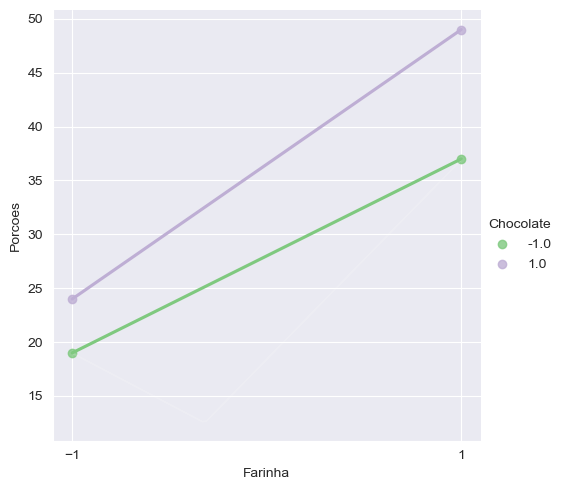

In [13]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', hue = 'Chocolate', ci = False)
ax1.set(xticks = (-1,1))

### Para o chocolate

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


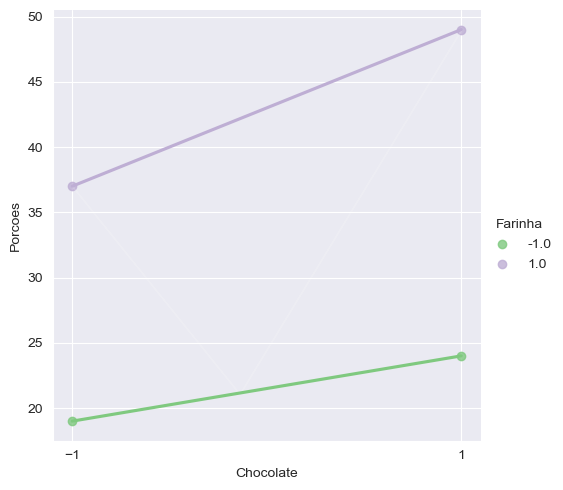

In [14]:
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', hue = 'Farinha', ci = False)
ax2.set(xticks = (-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [15]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

### .

In [16]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [17]:
modelo_ajustado = modelo.fit()

In [18]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        20:30:20   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\statsmodels\base\model.py:1529: RuntimeWarning: inva

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [19]:
centro = np.array([[0,0,29],[0,0,30],[0,0,29],[0,0,30]])

In [20]:
centro_df = pd.DataFrame(data = centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = range(5,9))

In [21]:
centro_df

,Farinha,Chocolate,Porcoes
5,0,0,29
6,0,0,30
7,0,0,29
8,0,0,30


### .

In [22]:
experimento = pd.concat([experimento, centro_df])
experimento.rename_axis("Ensaios", axis = 'columns', inplace = True)

In [23]:
experimento

Ensaios,Farinha,Chocolate,Porcoes
1,-1.0,-1.0,19
2,1.0,-1.0,37
3,-1.0,1.0,24
4,1.0,1.0,49
5,0.0,0.0,29
6,0.0,0.0,30
7,0.0,0.0,29
8,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [24]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [25]:
modelo_ajustado = modelo.fit()

In [26]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Fri, 17 May 2024   Prob (F-statistic):            0.00152
Time:                        20:30:20   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [27]:
t_valores = modelo_ajustado.tvalues

In [28]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [29]:
nome = t_valores.index.to_list()

In [30]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [31]:
from scipy import stats

### .


In [32]:
distribuicao = stats.t(df = 4)

In [33]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [34]:
limite  = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

In [35]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

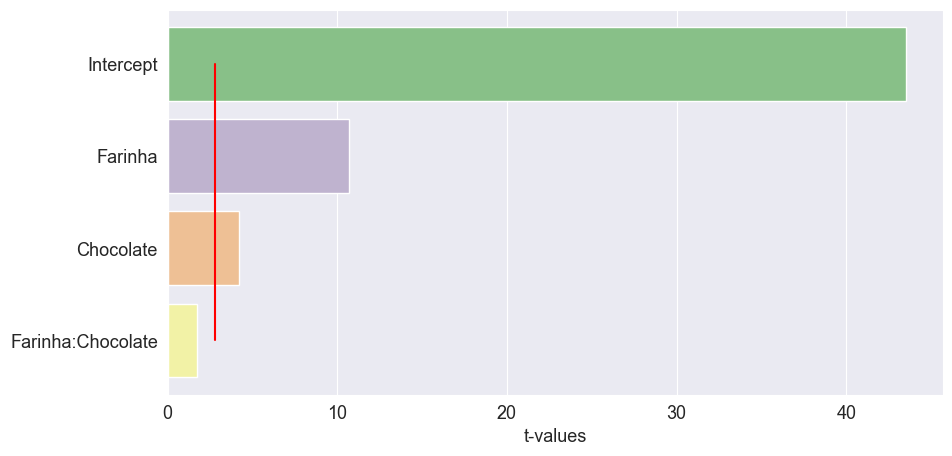

In [36]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(10,5)
pareto.tick_params(labelsize = 13)
pareto.set_xlabel("t-values", fontsize = 13)

pareto.plot(limite, nome, color = 'red')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [37]:
modelo2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [38]:
modelo_ajustado2 = modelo2.fit()

In [39]:
print(modelo_ajustado2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 17 May 2024   Prob (F-statistic):           0.000571
Time:                        20:30:20   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [40]:
t_valores = modelo_ajustado2.tvalues

In [41]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [42]:
nome = t_valores.index.to_list()

In [43]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [44]:
distribuicao = stats.t(df = 5)

In [45]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [46]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

### Plotando o gráfico

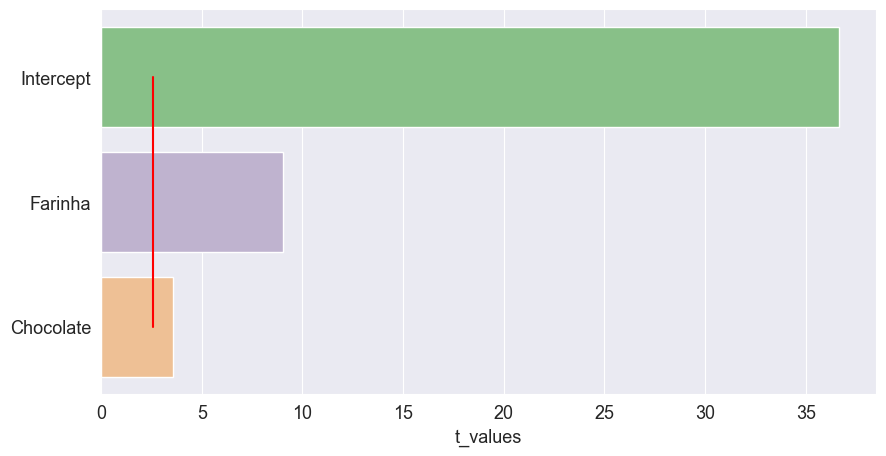

In [47]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(10,5)
pareto.tick_params(labelsize = 13)
pareto.set_xlabel("t_values", fontsize = 13)

pareto.plot(limite, nome, color = 'red')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [48]:
observados = experimento['Porcoes']

In [49]:
observados

1    19
2    37
3    24
4    49
5    29
6    30
7    29
8    30
Name: Porcoes, dtype: int64

### .

In [50]:
preditos = modelo_ajustado2.predict()

In [51]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

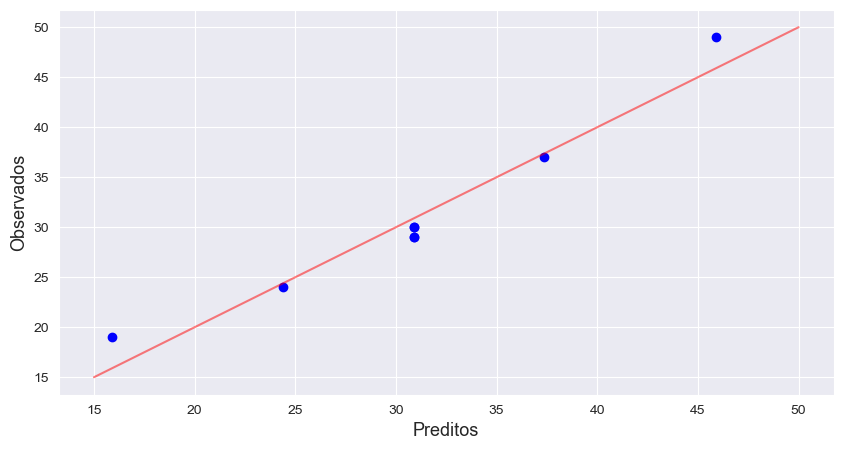

In [53]:
plt.figure(figsize = (10,5))

plt.xlabel("Preditos", fontsize = 13)
plt.ylabel("Observados", fontsize = 13)


# linha de guia
x = np.linspace(start = 15, stop = 50)
y = np.linspace(start = 15, stop = 50)

plt.plot(x, y, color = 'red', alpha = 0.5)


# comparacao
plt.scatter(x = preditos, y = observados, color = 'blue')

<hr>

In [54]:
print(modelo_ajustado2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 17 May 2024   Prob (F-statistic):           0.000571
Time:                        20:30:20   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\Vitor Marinho\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [55]:
parametros = modelo_ajustado2.params

In [56]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [57]:
def modelo_receita(x_f, x_c):
    
    # limite
    limite_normalizado = [-1,1]
    limite_farinha = [0.5,1.5]
    limite_chocolate = [0.1,0.5]
    
    # convertendo
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha'] * x_f_convertido + parametros['Chocolate'] * x_c_convertido
    
    return round(porcoes)


In [58]:
modelo_receita(1.5,0.5)

46


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [59]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)

In [60]:
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

### . 

In [61]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)

In [62]:
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### .

In [63]:
pontos = []

for cont_f in x_farinha:
    temp = []
    
    for cont_c in x_chocolate:
        temp.append(modelo_receita(cont_f, cont_c))
    pontos.append(temp)

In [64]:
temp

[37, 38, 39, 40, 41, 42, 43, 44, 45, 46]

### Construindo a superfície de resposta

In [65]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

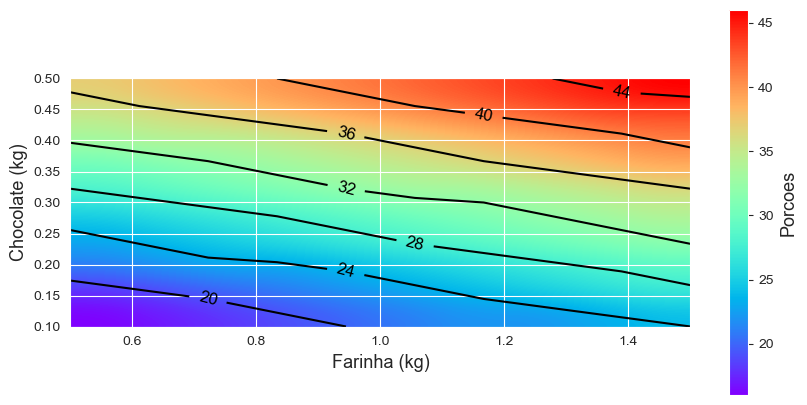

In [86]:
# base
plt.figure(figsize = (10,5))
plt.xlabel("Farinha (kg)", fontsize = 13)
plt.ylabel("Chocolate (kg)", fontsize = 13)


# mapa de cores
mapa_cor = plt.imshow(pontos, cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5,1.5,0.1,0.5), 
                      origin = 'lower')


# barra de cor
plt.colorbar().set_label('Porcoes', fontsize = 13)


# linha
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'black', linewidths = 1.5)
plt.clabel(linhas, inline = True, fontsize = 12, inline_spacing = 10)